## Import

In [532]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam, Adamax

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta
from tensorflow.keras import layers

from keras.layers import Conv1D, MaxPooling1D


from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [533]:
data = pd.read_csv("cocacola.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


# Dataset info

In [534]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [535]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [537]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [538]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [539]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

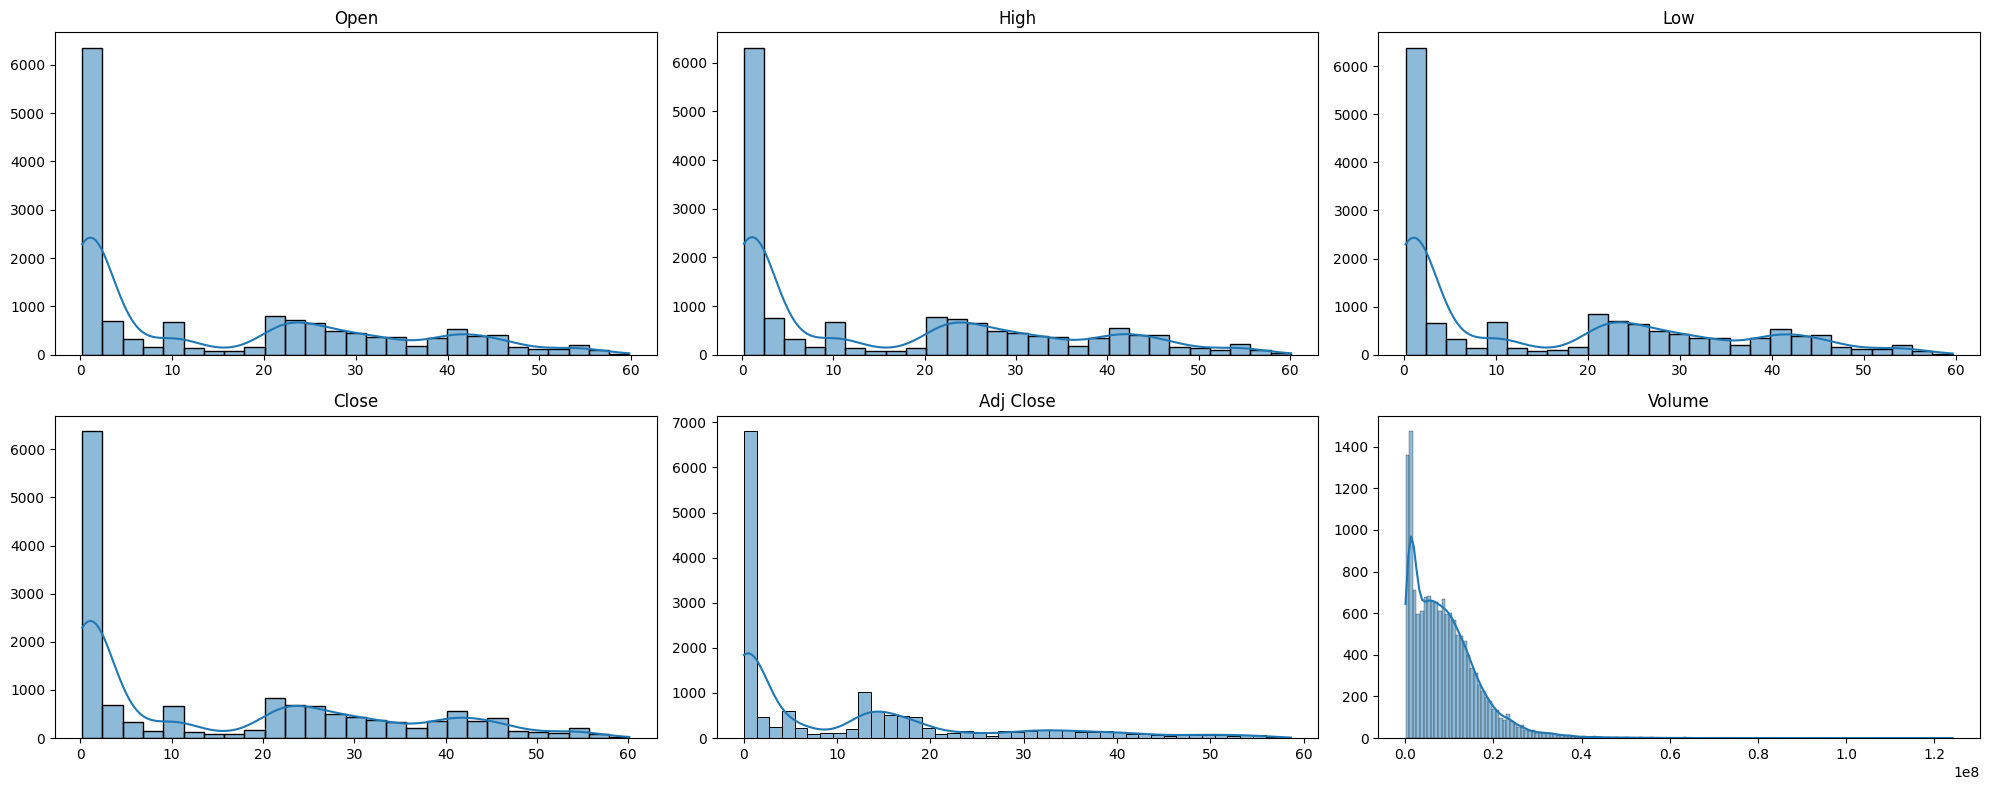

In [540]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

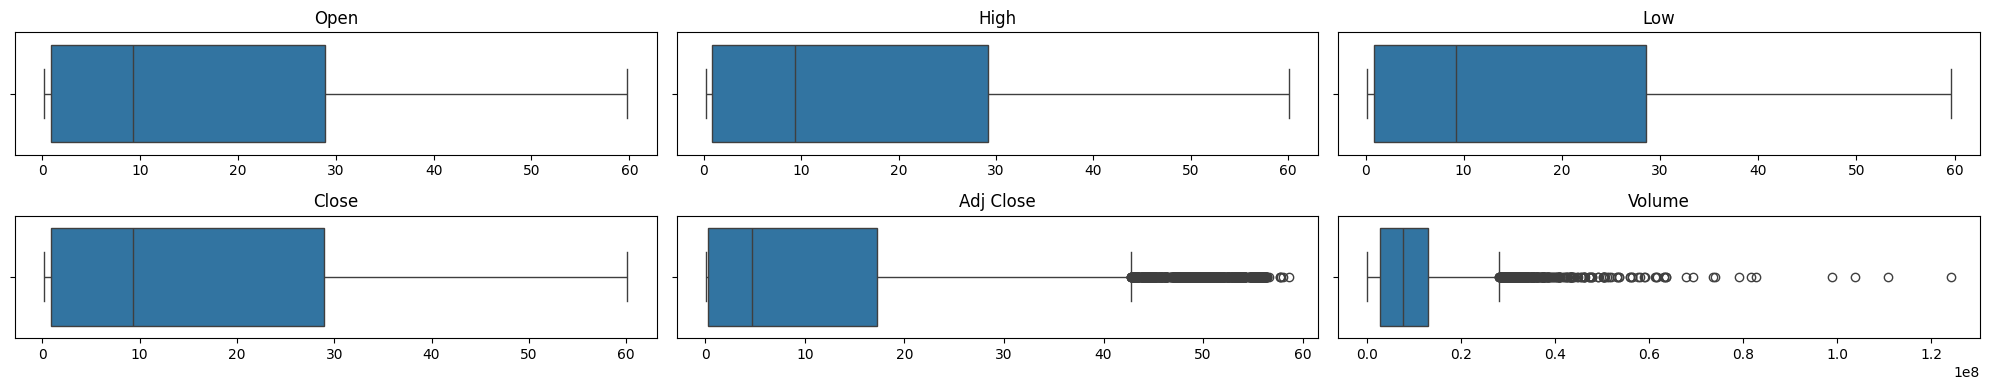

In [541]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [542]:
def plot(data, columns, x):
    fig, axes = plt.subplots(3, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

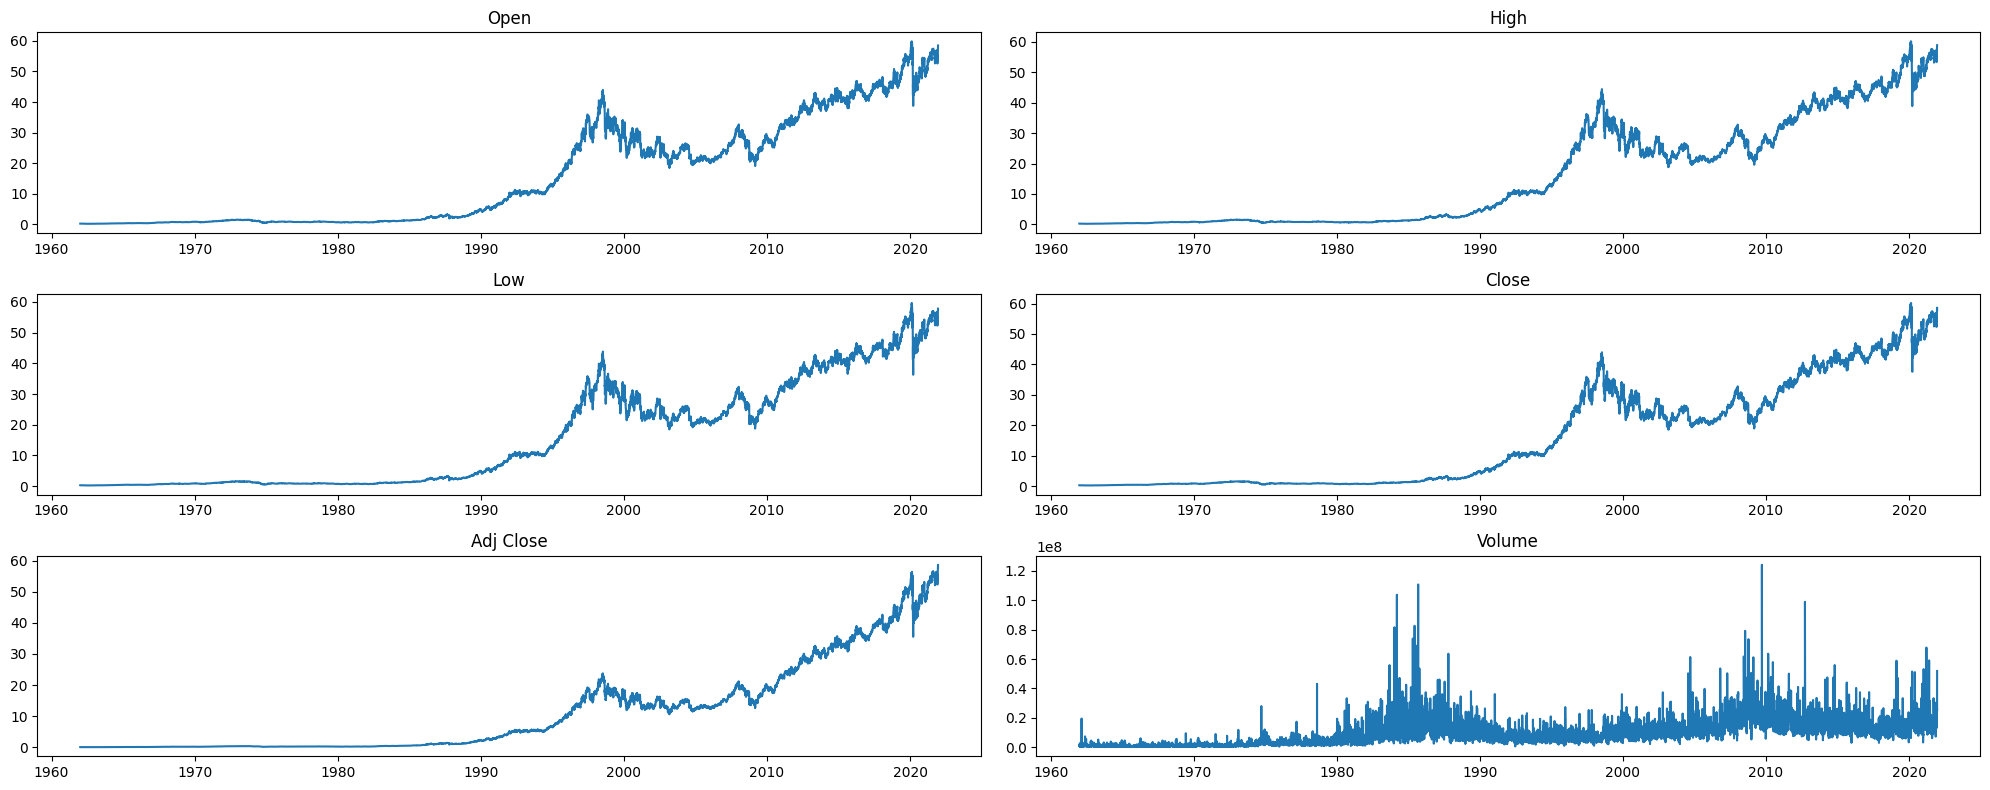

In [543]:
plot(data, columns, 'Date')

In [544]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


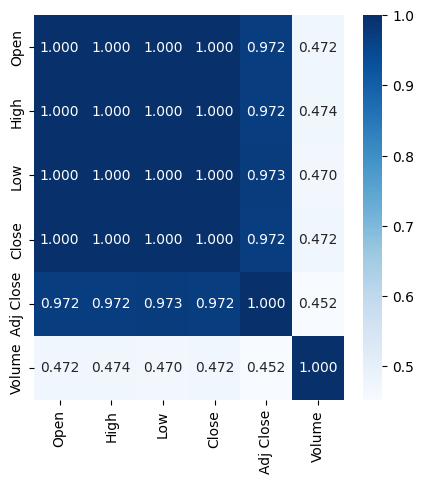

In [545]:
df_corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

# Podela podataka na test, train i val

Podela podataka na train, val i test skup (70%, 20%, 10%).

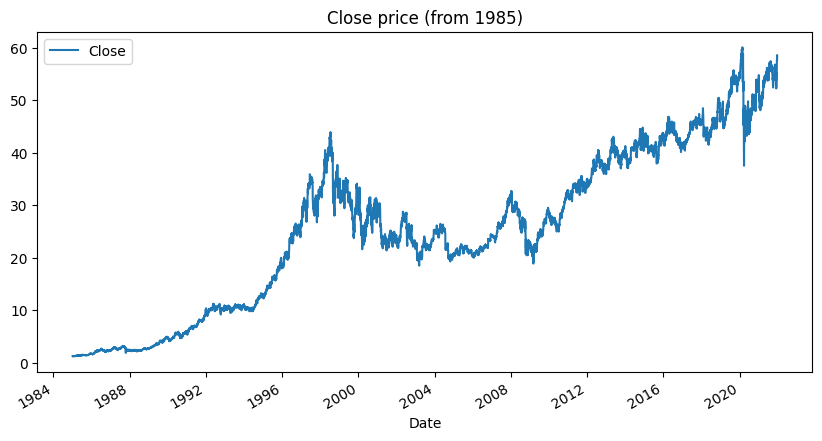

In [546]:
relevant_data = data["1985":]

relevant_data[["Close"]].plot(figsize=(10, 5))
plt.title("Close price (from 1985)")
plt.show()

In [547]:
data = data["1985":]

In [548]:
data = data.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume'])

In [549]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (6522, 1) 
Validation size :  (1864, 1) 
Test Size :  (932, 1)


,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2010-11-03,30.975000
2010-11-04,31.225000
2010-11-05,31.290001


In [550]:
train_df.columns

Index(['Close'], dtype='object')

# Normalizacija podataka

In [551]:
scaler = MinMaxScaler()

col = ['Close']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [552]:
target = ['Close']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [553]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 10, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 10, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 10, 1)

In [554]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (6512, 10, 1) (6512, 1) 
 Val size :  (1854, 10, 1) (1854, 1) 
 Test Size :  (922, 10, 1) (6512, 1)


# custom loss

In [555]:

def custom_loss(y_true, y_pred):

    error = tf.abs(y_true - y_pred)
    
    punishment_factor = 2.0
    
    weighted_error = tf.where(error < 1, error, punishment_factor * error)
    
    return tf.reduce_mean(weighted_error)

# pomocne funkcije

In [557]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [558]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()




In [559]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


In [560]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Modeli


Epoch: One pass through all of the rows in the training dataset
Batch: One or more samples considered by the model within an epoch before weights are updated

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. Using a sigmoid on the output layer ensures your network output is between 0 and 1 and is easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.



## SimpleRNN

### Adam

#### simple RNN

In [561]:

model_srnn = Sequential()
model_srnn.add(SimpleRNN(units = 32, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_srnn.add(Dense(units = 1))
model_srnn.compile(optimizer=Adam(learning_rate=0.001), loss = "mean_squared_error")
history = model_srnn.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 50, batch_size = 32, callbacks=[ history, early_stopping] )


Epoch 1/50
103/204 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0355

204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0219 - val_loss: 1.5850e-04
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0303e-04 - val_loss: 1.2661e-04
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0579e-05 - val_loss: 1.1947e-04
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.5271e-05 - val_loss: 1.8516e-04
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.5336e-05 - val_loss: 1.2041e-04
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.1618e-05 - val_loss: 2.2606e-04
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.7742e-05 - val_loss: 9.7218e-05
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6462e-05 - val_loss: 2.4877e-04
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.5023e-05 - val_loss: 1.7202e-04
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.1878e-05 - val_loss: 9.4312e-05
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1321e-05 - 

In [562]:
model_srnn.evaluate(X_test,Y_test)
model_srnn.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1131e-04


Model: "sequential_191"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_55 (SimpleRNN)       │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_365 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

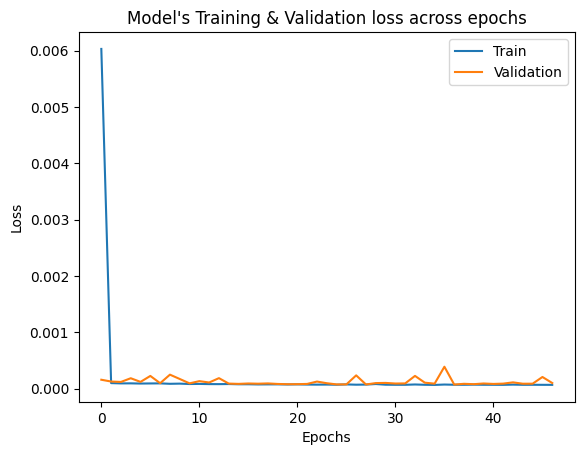

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


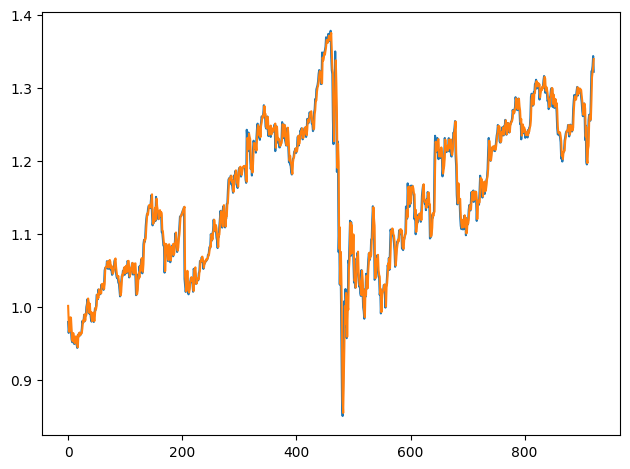

In [563]:

plotloss(history)
print_result(model_srnn, 'SimpleRNN U32, Adam', X_test, Y_test, 200)


#### 50 units and early stopping

In [564]:
model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))

model.add(Dense(units = 1, activation='sigmoid')) 

model.compile(optimizer = Adam(learning_rate=0.001), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val),  epochs = 50, batch_size = 32, callbacks=[ history, early_stopping])

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0721 - root_mean_squared_error: 0.1069 - val_loss: 0.0230 - val_mean_absolute_error: 0.1472 - val_root_mean_squared_error: 0.1516
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0012 - mean_absolute_error: 0.0247 - root_mean_squared_error: 0.0340 - val_loss: 0.0211 - val_mean_absolute_error: 0.1414 - val_root_mean_squared_error: 0.1451
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 8.4240e-04 - mean_absolute_error: 0.0208 - root_mean_squared_error: 0.0290 - val_loss: 0.0259 - val_mean_absolute_error: 0.1582 - val_root_mean_squared_error: 0.1609
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.8724e-04 - mean_absolute_error: 0.0188 - root_mean_squared_error: 0.0262 - val_loss: 0.0101 - val_mean_absolute_error: 0.0958 - val_root_mean_squared_error: 0.1004
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 4.7387e-04 - mean_absolute_error: 0.0151 - root_m

In [565]:
model.evaluate(X_test,Y_test)
model.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0630 - mean_absolute_error: 0.2411 - root_mean_squared_error: 0.2482


Model: "sequential_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_56 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_169 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_57 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_170 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_58 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_59 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_366 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

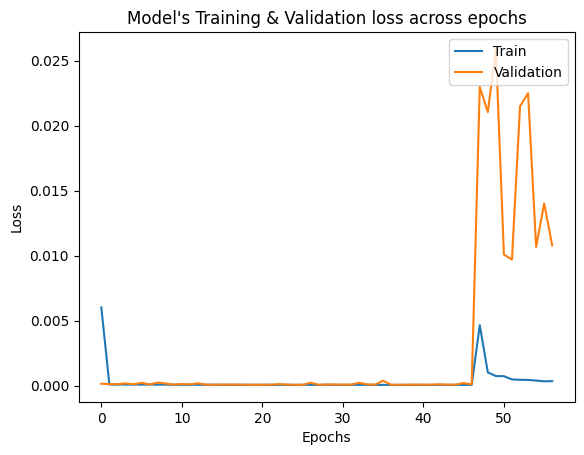

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


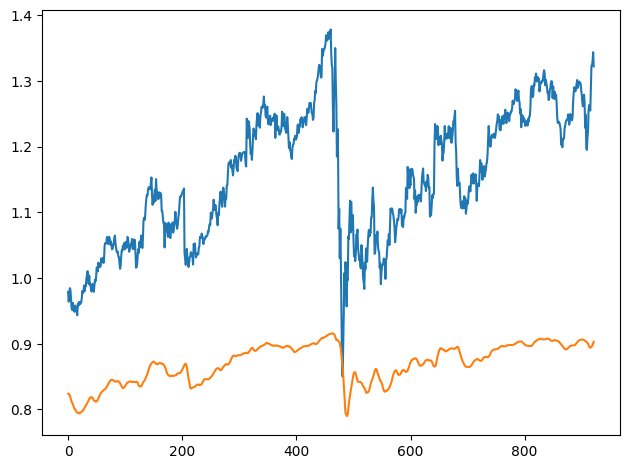

In [566]:

plotloss(history)
print_result(model, 'SimpleRNN L4 U50, Dropout, Adam ', X_test, Y_test, 200)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2063 - val_loss: 0.3556
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0498 - val_loss: 0.0447
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0105 - val_loss: 0.0163
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0023 - val_loss: 0.0048
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0015 - val_loss: 0.0034


Model: "sequential_193"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_171 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_60 (SimpleRNN)       │ (None, 20)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_367 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_368 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,193 (28.10 KB)

 Trainable params: 2,397 (9.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,796 (18.74 KB)

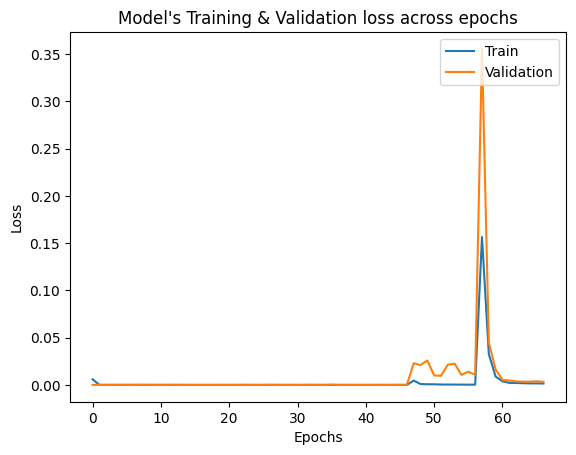

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


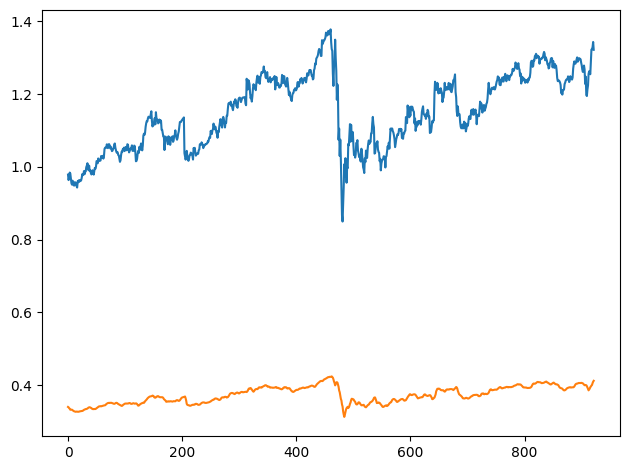

In [567]:
model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))),
model_conv.add(MaxPooling1D(pool_size=2)),
model_conv.add(Dropout(0.2)),
model_conv.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_conv.add(Dense(20, activation='relu'))
model_conv.add(Dense(1))
model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + SimpleRNN U20 dropout  Adam', X_test, Y_test)

### SGD

In [568]:

model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))

model.add(Dense(units = 1, activation='sigmoid')) 

model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 60, batch_size = 32,callbacks=[ history, early_stopping] )


Epoch 1/60


204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0535 - mean_absolute_error: 0.1843 - root_mean_squared_error: 0.2294 - val_loss: 0.0281 - val_mean_absolute_error: 0.1564 - val_root_mean_squared_error: 0.1676
Epoch 2/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0072 - mean_absolute_error: 0.0678 - root_mean_squared_error: 0.0848 - val_loss: 0.0168 - val_mean_absolute_error: 0.1164 - val_root_mean_squared_error: 0.1296
Epoch 3/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0037 - mean_absolute_error: 0.0491 - root_mean_squared_error: 0.0607 - val_loss: 0.0160 - val_mean_absolute_error: 0.1133 - val_root_mean_squared_error: 0.1263
Epoch 4/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0028 - mean_absolute_error: 0.0430 - root_mean_squared_error: 0.0534 - val_loss: 0.0145 - val_mean_absolute_error: 0.1069 - val_root_mean_squared_error: 0.1205
Epoch 5/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0025 - mean_absolute_error: 0.0396 - root_mean_squared_e

In [569]:
model.evaluate(X_test,Y_test)
model.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0893 - mean_absolute_error: 0.2881 - root_mean_squared_error: 0.2956


Model: "sequential_194"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_61 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_172 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_62 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_63 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_64 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_369 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

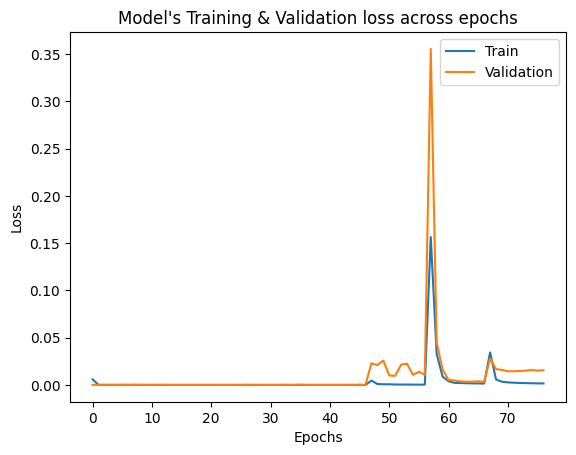

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


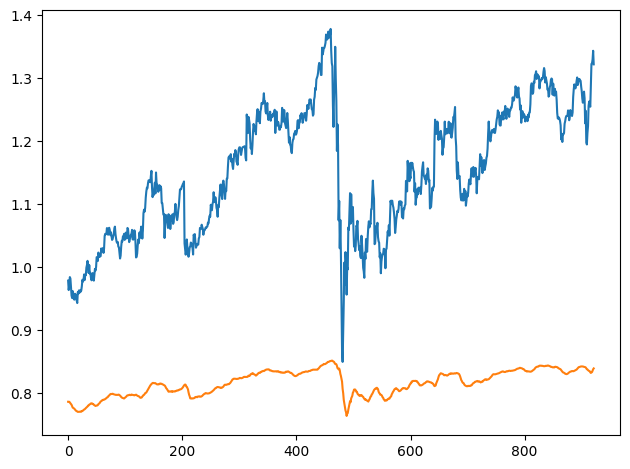

In [570]:
plotloss(history)
print_result(model, 'SimpleRNN U32, Dropout, SGD 0.001', X_test, Y_test, 200)

## LSTM

### Adam

#### LSTM  64

Epoch 1/150


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0185 - mean_absolute_error: 0.0746 - val_loss: 2.1275e-04 - val_mean_absolute_error: 0.0110
Epoch 2/150
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0681e-04 - mean_absolute_error: 0.0092 - val_loss: 2.1369e-04 - val_mean_absolute_error: 0.0112
Epoch 3/150
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0119e-04 - mean_absolute_error: 0.0089 - val_loss: 2.0994e-04 - val_mean_absolute_error: 0.0110
Epoch 4/150
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1651e-04 - mean_absolute_error: 0.0089 - val_loss: 2.3072e-04 - val_mean_absolute_error: 0.0119
Epoch 5/150
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9448e-04 - mean_absolute_error: 0.0088 - val_loss: 2.0235e-04 - val_mean_absolute_error: 0.0109
Epoch 6/150
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.9250e-04 - mean_absolute_error: 0.0087 - val_loss: 2.1033e-04 - val_mean_absolute_error: 0.0113
Epoch 7/150
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1

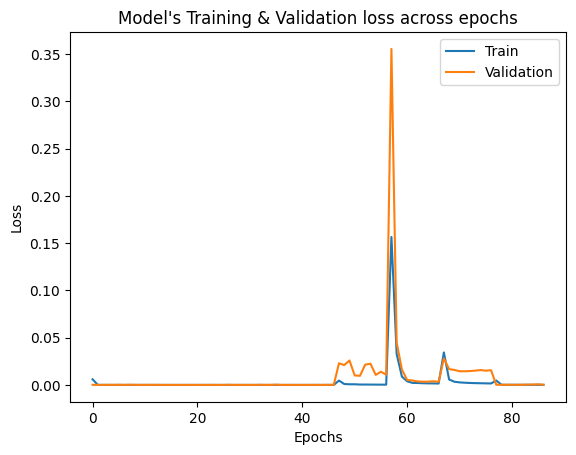

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


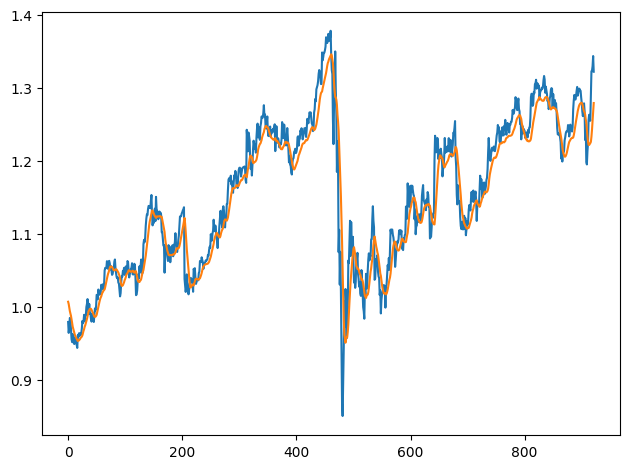

In [571]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'LSTM U64, Adam', X_test, Y_test)


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0232 - mean_absolute_error: 0.0839 - val_loss: 4.1932e-04 - val_mean_absolute_error: 0.0173
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9812e-04 - mean_absolute_error: 0.0087 - val_loss: 2.1077e-04 - val_mean_absolute_error: 0.0108
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9783e-04 - mean_absolute_error: 0.0087 - val_loss: 2.1242e-04 - val_mean_absolute_error: 0.0109
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.8366e-04 - mean_absolute_error: 0.0085 - val_loss: 5.8010e-04 - val_mean_absolute_error: 0.0212
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.8506e-04 - mean_absolute_error: 0.0087 - val_loss: 1.8131e-04 - val_mean_absolute_error: 0.0103
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0912e-04 - mean_absolute_error: 0.0090 - val_loss: 1.7288e-04 - val_mean_absolute_error: 0.0101
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.645

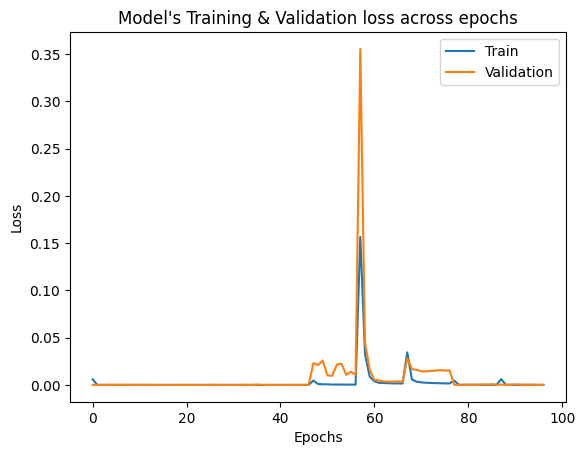

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


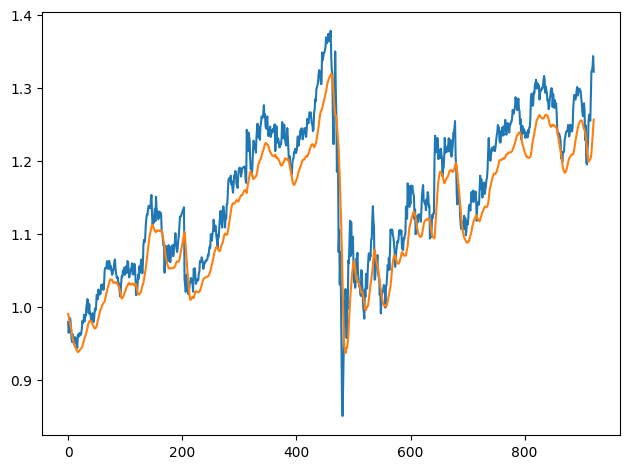

In [572]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))

model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'LSTM U64, fully connected, Adam', X_test, Y_test)


#### LSTM 2 layers 64,32

In [573]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(32, return_sequences = False))
regressorLSTM.add(Dense(32, activation="relu"))
regressorLSTM.add(Dense(1))
regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0349 - mean_absolute_error: 0.1021 - val_loss: 5.2080e-04 - val_mean_absolute_error: 0.0184
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.9518e-04 - mean_absolute_error: 0.0106 - val_loss: 8.0175e-04 - val_mean_absolute_error: 0.0238
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 2.9414e-04 - mean_absolute_error: 0.0106 - val_loss: 5.6181e-04 - val_mean_absolute_error: 0.0195
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 3.0648e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0011 - val_mean_absolute_error: 0.0284
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 2.7346e-04 - mean_absolute_error: 0.0108 - val_loss: 4.8348e-04 - val_mean_absolute_error: 0.0180
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.7097e-04 - mean_absolute_error: 0.0106 - val_loss: 3.2873e-04 - val_mean_absolute_error: 0.0140
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.80

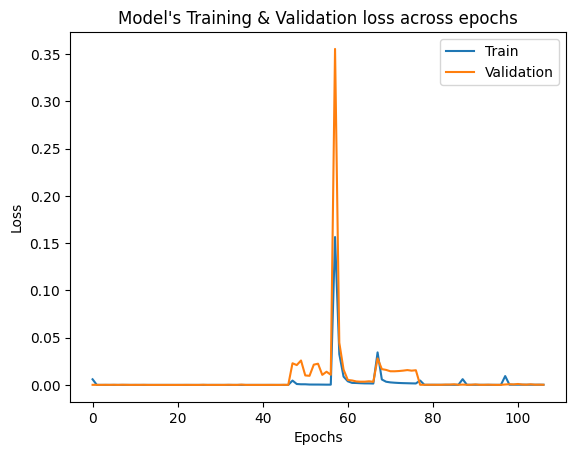

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


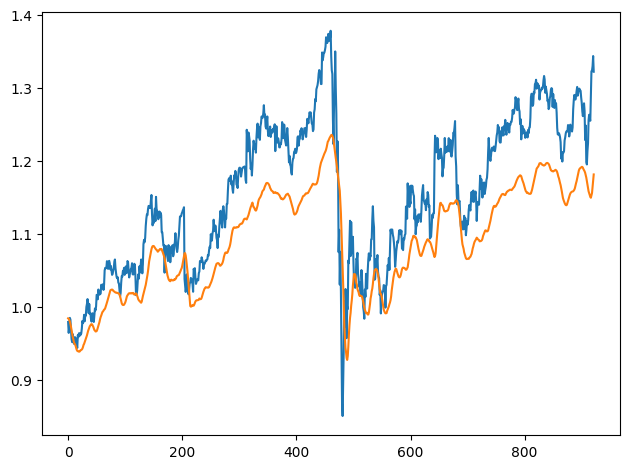

In [574]:

plotloss(history)
print_result(regressorLSTM, 'LSTM L2 U64,32  Adam', X_test, Y_test)


In [575]:

regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)


Model: "sequential_197"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_203 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_204 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_374 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_375 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,205 (356.27 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,804 (237.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0496  


#### LSTM 32,16

In [576]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(16, return_sequences = False))
regressorLSTM.add(Dense(1))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error"])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=16, callbacks=[history, early_stopping])



Epoch 1/200


407/407 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0140 - mean_absolute_error: 0.0640 - val_loss: 0.0014 - val_mean_absolute_error: 0.0302
Epoch 2/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 6.7015e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0024 - val_mean_absolute_error: 0.0435
Epoch 3/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 4.9297e-04 - mean_absolute_error: 0.0151 - val_loss: 8.1524e-04 - val_mean_absolute_error: 0.0234
Epoch 4/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 4.4202e-04 - mean_absolute_error: 0.0144 - val_loss: 5.7660e-04 - val_mean_absolute_error: 0.0199
Epoch 5/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 4.3401e-04 - mean_absolute_error: 0.0140 - val_loss: 2.4430e-04 - val_mean_absolute_error: 0.0120
Epoch 6/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 3.9017e-04 - mean_absolute_error: 0.0134 - val_loss: 9.9333e-04 - val_mean_absolute_error: 0.0284
Epoch 7/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 3.4

In [577]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0860


Model: "sequential_198"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_205 (LSTM)                 │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_173 (Dropout)           │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_206 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_376 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

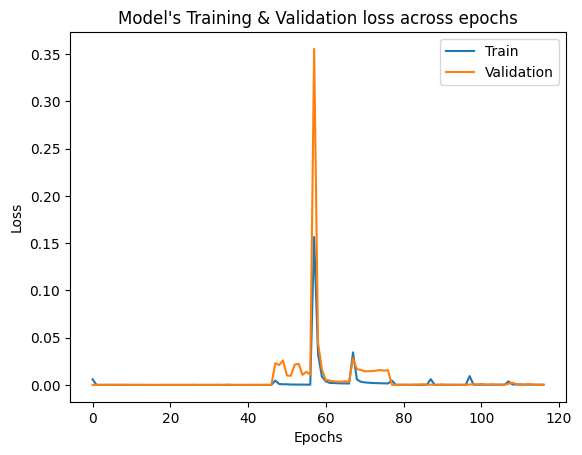

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


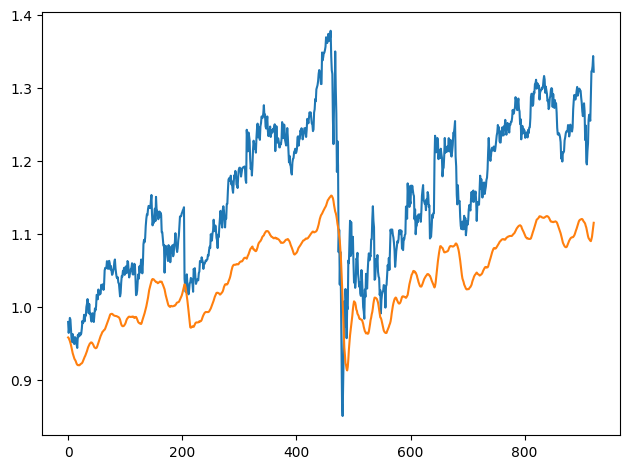

In [578]:

plotloss(history)
print_result(regressorLSTM, 'LSTM U32, 16, Dropout, Adam ', X_test, Y_test)



#### LSTM 4 layers 50 units dropout

In [579]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=1,activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])


Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0534 - val_loss: 0.0053 - val_mean_absolute_error: 0.0671
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 6.7956e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0027 - val_mean_absolute_error: 0.0457
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 6.0814e-04 - mean_absolute_error: 0.0170 - val_loss: 6.5524e-04 - val_mean_absolute_error: 0.0205
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 5.0741e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0015 - val_mean_absolute_error: 0.0341
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - loss: 5.4577e-04 - mean_absolute_error: 0.0160 - val_loss: 4.5073e-04 - val_mean_absolute_error: 0.0166
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 4.8347e-04 - mean_absolute_error: 0.0154 - val_loss: 6.6477e-04 - val_mean_absolute_error: 0.0212
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss:

In [580]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0184 - mean_absolute_error: 0.1274


Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_207 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_174 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_208 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_209 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_210 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_377 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

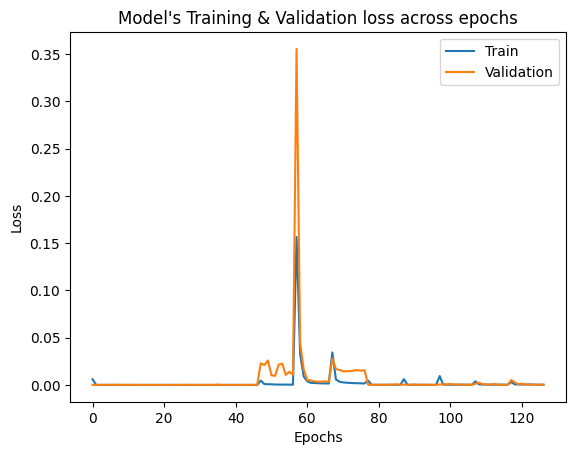

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


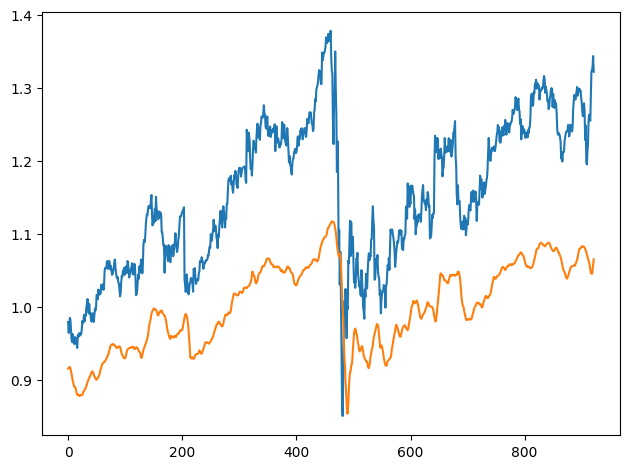

In [581]:

plotloss(history)
print_result(regressorLSTM, 'LSTM L4 U50, dropout, Adam', X_test, Y_test)


### Adamax

#### 64 units

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0153 - mean_absolute_error: 0.0715 - val_loss: 9.8665e-04 - val_mean_absolute_error: 0.0262
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.7522e-04 - mean_absolute_error: 0.0120 - val_loss: 6.5936e-04 - val_mean_absolute_error: 0.0210
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4453e-04 - mean_absolute_error: 0.0106 - val_loss: 3.8301e-04 - val_mean_absolute_error: 0.0152
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.2181e-04 - mean_absolute_error: 0.0098 - val_loss: 2.3767e-04 - val_mean_absolute_error: 0.0121
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.0430e-04 - mean_absolute_error: 0.0091 - val_loss: 2.5272e-04 - val_mean_absolute_error: 0.0126
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.1414e-04 - mean_absolute_error: 0.0090 - val_loss: 2.9470e-04 - val_mean_absolute_error: 0.0139
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0951

Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_211 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_378 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mean_absolute_error: 0.0469


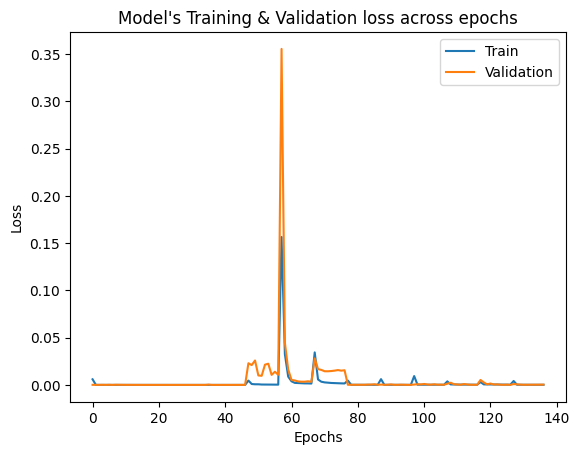

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


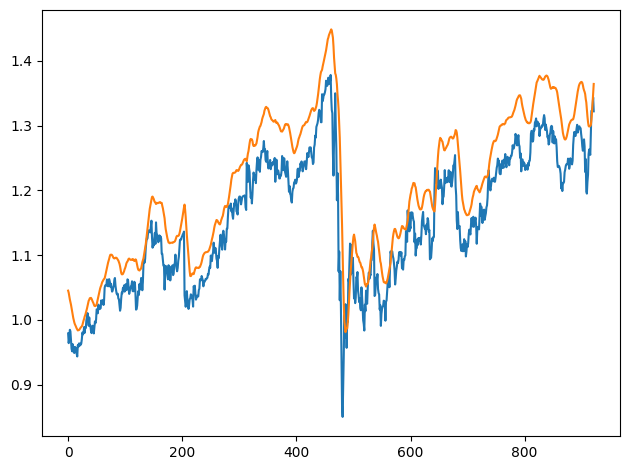

In [582]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM U64 Adamax', X_test, Y_test)

#### lstm 2 layers 64,32 units, dropout

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0346 - mean_absolute_error: 0.1173 - val_loss: 3.6197e-04 - val_mean_absolute_error: 0.0144
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0329 - val_loss: 5.8548e-04 - val_mean_absolute_error: 0.0205
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0018 - mean_absolute_error: 0.0293 - val_loss: 0.0031 - val_mean_absolute_error: 0.0524
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0015 - mean_absolute_error: 0.0269 - val_loss: 4.2012e-04 - val_mean_absolute_error: 0.0166
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0014 - mean_absolute_error: 0.0260 - val_loss: 6.6279e-04 - val_mean_absolute_error: 0.0218
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0014 - mean_absolute_error: 0.0255 - val_loss: 0.0032 - val_mean_absolute_error: 0.0532
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011 - mean_absolute_error

Model: "sequential_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_212 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_175 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_213 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_176 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_379 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_380 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5961e-04 - mean_absolute_error: 0.0214


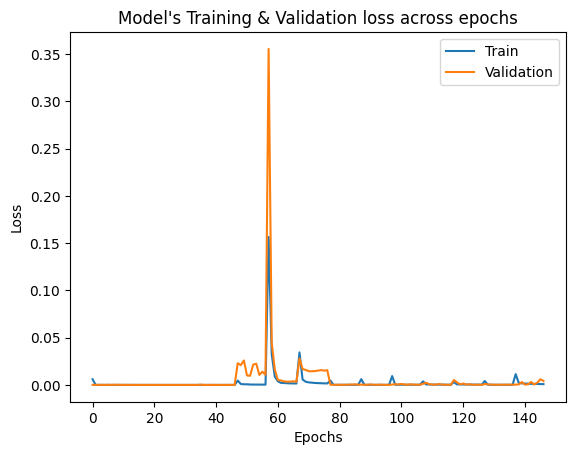

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


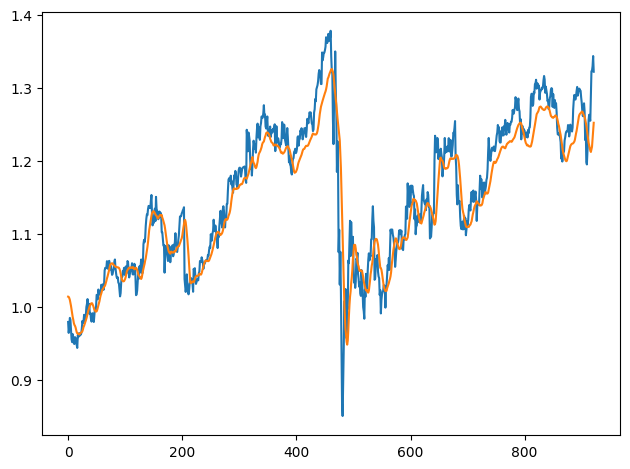

In [583]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adamax ', X_test, Y_test)

### Adagrad

#### LSTM 2 layers 50units dropout

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.1306 - mean_absolute_error: 0.2967 - val_loss: 0.3140 - val_mean_absolute_error: 0.5545
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0498 - mean_absolute_error: 0.1957 - val_loss: 0.1809 - val_mean_absolute_error: 0.4187
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0328 - mean_absolute_error: 0.1609 - val_loss: 0.1302 - val_mean_absolute_error: 0.3540
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.1376 - val_loss: 0.1035 - val_mean_absolute_error: 0.3148
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.1277 - val_loss: 0.0845 - val_mean_absolute_error: 0.2839
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0176 - mean_absolute_error: 0.1129 - val_loss: 0.0686 - val_mean_absolute_error: 0.2554
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.1017 - val_l

Model: "sequential_202"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_214 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_177 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_215 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_178 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_381 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_382 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,804 (249.24 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,903 (124.62 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5164 - mean_absolute_error: 0.7134


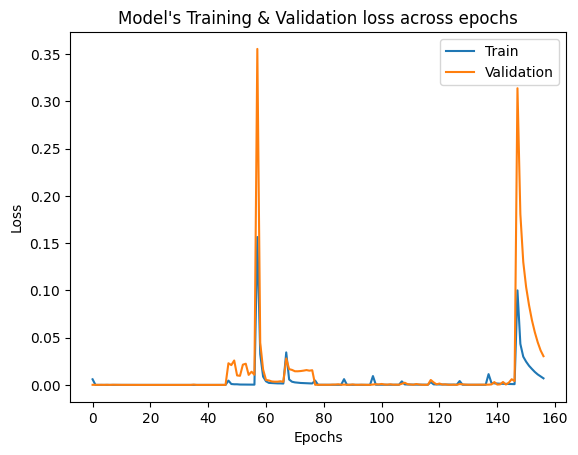

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


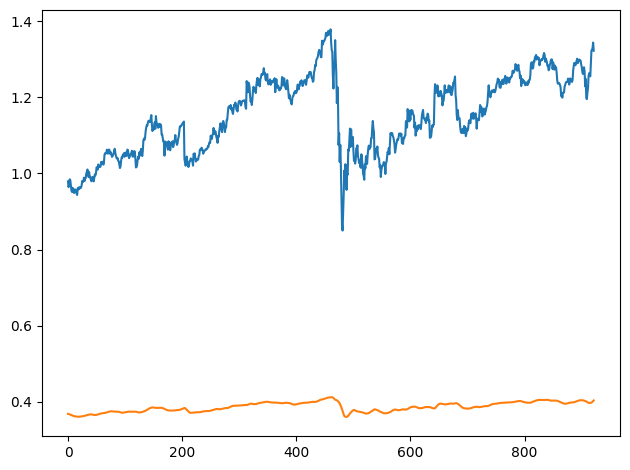

In [584]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(loss='mse',  optimizer=Adagrad(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adagrad ', X_test, Y_test)

### Adadelta

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.2371 - mean_absolute_error: 0.4091 - val_loss: 0.9225 - val_mean_absolute_error: 0.9554
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2326 - mean_absolute_error: 0.4042 - val_loss: 0.9005 - val_mean_absolute_error: 0.9439
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2260 - mean_absolute_error: 0.3981 - val_loss: 0.8771 - val_mean_absolute_error: 0.9315
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2184 - mean_absolute_error: 0.3897 - val_loss: 0.8476 - val_mean_absolute_error: 0.9156
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2119 - mean_absolute_error: 0.3825 - val_loss: 0.8163 - val_mean_absolute_error: 0.8985
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2015 - mean_absolute_error: 0.3735 - val_loss: 0.7869 - val_mean_absolute_error: 0.8821
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1933 - mean_absolute_error: 0.3637 - val_l

Model: "sequential_203"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_216 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_179 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_217 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_180 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_383 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_384 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3254 - mean_absolute_error: 1.1467


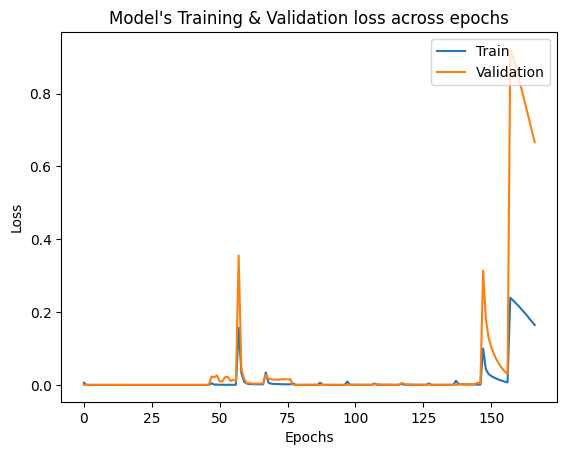

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


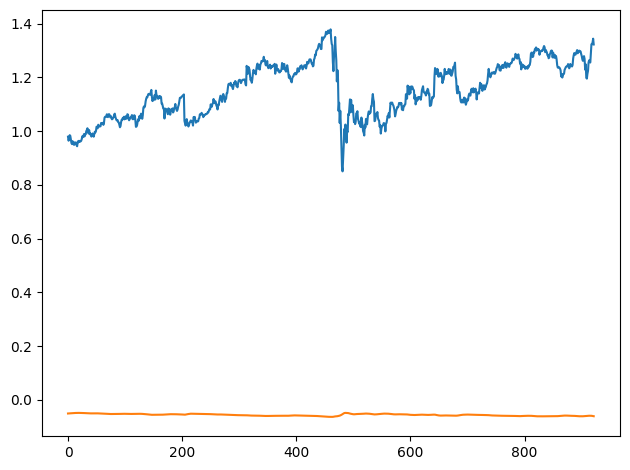

In [585]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(loss='mse',  optimizer=Adadelta(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adadelta ', X_test, Y_test)

### Custom loss 

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - val_loss: 0.0434 - val_mean_absolute_error: 0.0433
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - val_loss: 0.0604 - val_mean_absolute_error: 0.0604
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0659 - val_mean_absolute_error: 0.0659
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0584 - val_mean_absolute_error: 0.0584
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.0819 - val_mean_absolute_error: 0.0819
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.0711 - val_mean_absolute_error: 0.0711
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - val_l

Model: "sequential_204"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_218 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_181 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_219 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_182 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_385 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_386 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0719 - mean_absolute_error: 0.0719


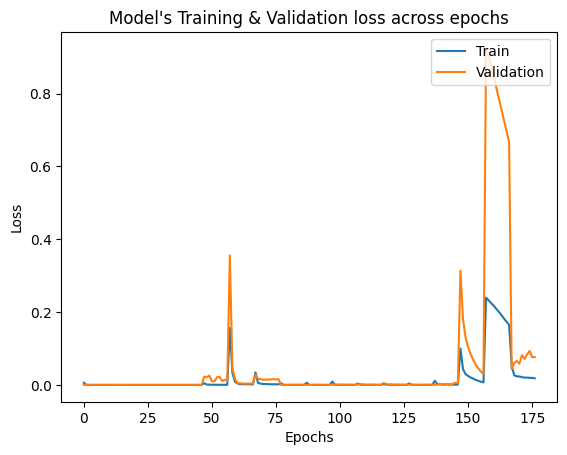

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


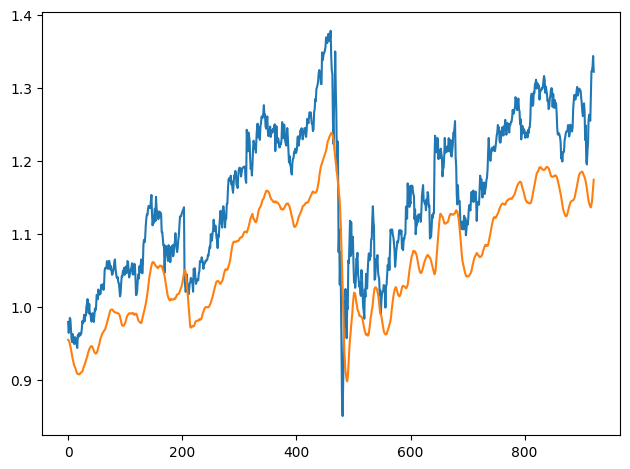

In [586]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(loss=custom_loss,  optimizer=Adamax(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout custom loss Adamax', X_test, Y_test)


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - val_loss: 0.0178 - val_mean_absolute_error: 0.0178
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - val_l

Model: "sequential_205"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_220 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_387 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0557 - mean_absolute_error: 0.0557


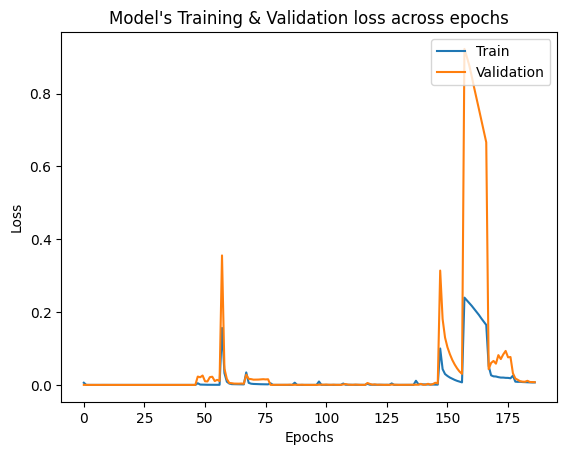

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


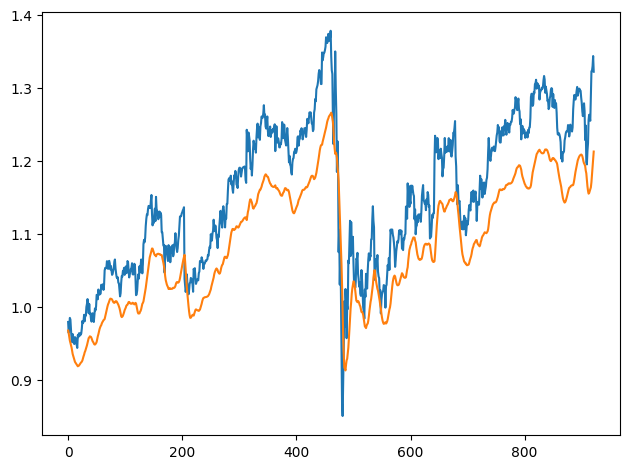

In [587]:


model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))
model.compile(loss=custom_loss,  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])

model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM U64, custom loss Adam', X_test, Y_test)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.1726 - val_loss: 0.0166
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0070 - val_loss: 6.6099e-04
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0025 - val_loss: 5.1887e-04
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0016 - val_loss: 9.8798e-04
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0013 - val_loss: 3.7597e-04
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0012 - val_loss: 3.6582e-04
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0011 - val_loss: 4.1211e-04
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0011 - val_loss: 3.2632e-04
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0010 - val_loss: 4.4291e-04
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0010 - val_loss: 4.1132e-04


Model: "sequential_206"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_183 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_221 (LSTM)                 │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_222 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_388 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,477 (185.46 KB)

 Trainable params: 15,825 (61.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,652 (123.64 KB)

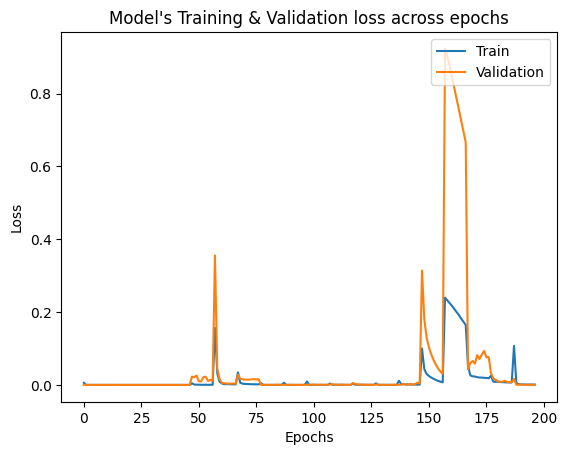

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


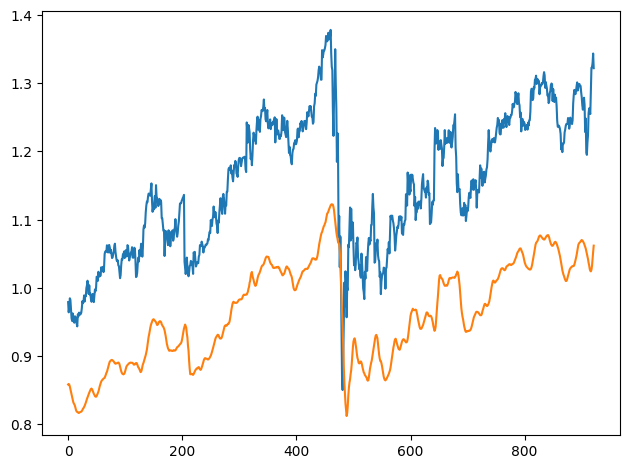

In [588]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(Dropout(0.2))
model_conv.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_conv.add(LSTM(16, return_sequences=False))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + LSTM L2 U32,16, dropout  Adam', X_test, Y_test)

### SGD

#### LSTM 2 layers 64,32 Dropout


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1378 - mean_absolute_error: 0.3066 - val_loss: 0.2908 - val_mean_absolute_error: 0.5324
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0497 - mean_absolute_error: 0.2005 - val_loss: 0.2074 - val_mean_absolute_error: 0.4479
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0423 - mean_absolute_error: 0.1825 - val_loss: 0.1792 - val_mean_absolute_error: 0.4160
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.1733 - val_loss: 0.1621 - val_mean_absolute_error: 0.3956
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0342 - mean_absolute_error: 0.1626 - val_loss: 0.1440 - val_mean_absolute_error: 0.3726
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0309 - mean_absolute_error: 0.1543 - val_loss: 0.1273 - val_mean_absolute_error: 0.3501
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0278 - mean_absolute_error: 0.1453 - val_l

Model: "sequential_221"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_229 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_200 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_230 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_201 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_419 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_420 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,903 (124.62 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5006 - mean_absolute_error: 0.7016


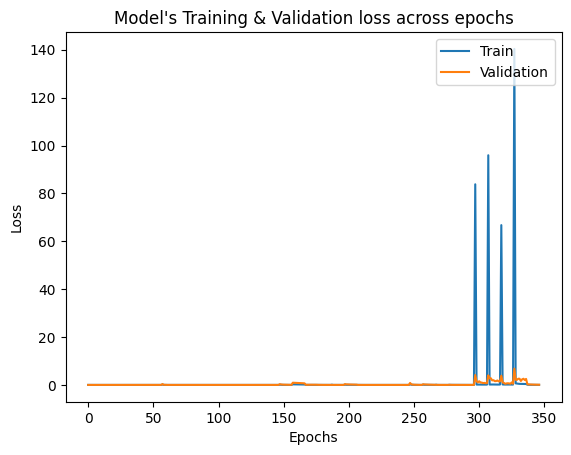

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


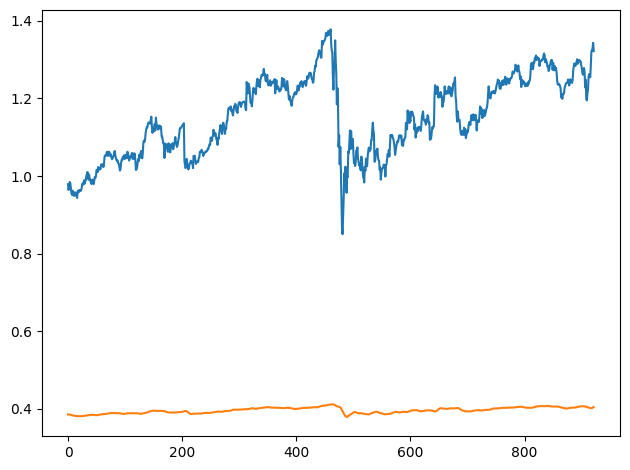

In [615]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(loss='mse',  optimizer=SGD(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, 32, dropout SGD ', X_test, Y_test)



## GRU

### Adam

### 4 layers 50 units and dropout

In [590]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=16, callbacks=[history, early_stopping])



Epoch 1/200


407/407 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0529 - val_loss: 6.1256e-04 - val_mean_absolute_error: 0.0207
Epoch 2/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 5.1058e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0042 - val_mean_absolute_error: 0.0624
Epoch 3/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 4.4611e-04 - mean_absolute_error: 0.0150 - val_loss: 4.0369e-04 - val_mean_absolute_error: 0.0165
Epoch 4/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.7004e-04 - mean_absolute_error: 0.0135 - val_loss: 2.1587e-04 - val_mean_absolute_error: 0.0113
Epoch 5/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 3.0199e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0017 - val_mean_absolute_error: 0.0392
Epoch 6/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 3.1463e-04 - mean_absolute_error: 0.0125 - val_loss: 4.4113e-04 - val_mean_absolute_error: 0.0180
Epoch 7/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - l

In [591]:
regressorGRU.summary()
result = regressorGRU.evaluate(X_test,Y_test)


Model: "sequential_208"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_122 (GRU)                   │ (None, 10, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_186 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_123 (GRU)                   │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_124 (GRU)                   │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_125 (GRU)                   │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_391 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,705 (631.66 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,804 (421.11 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0446


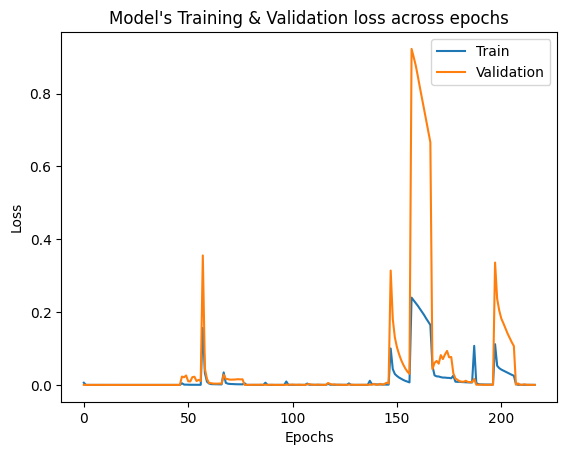

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


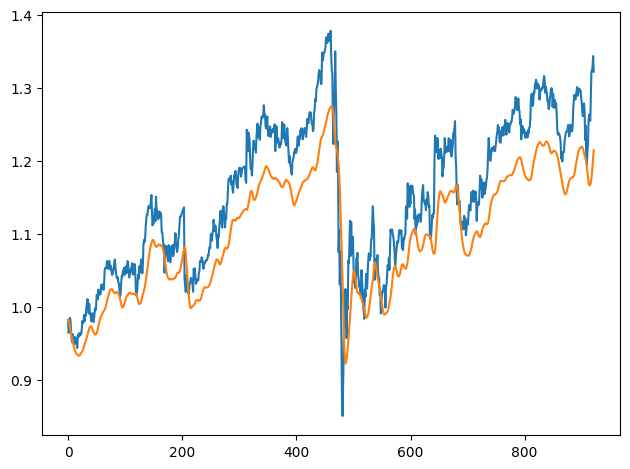

In [592]:

plotloss(history)

print_result(regressorGRU, 'GRU L4 U50, Adam ', X_test, Y_test)


### GRU 2 layers 64,16

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0656 - val_loss: 0.0056 - val_mean_absolute_error: 0.0725
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0373 - val_loss: 3.2945e-04 - val_mean_absolute_error: 0.0150
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0315 - val_loss: 2.8880e-04 - val_mean_absolute_error: 0.0141
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0017 - mean_absolute_error: 0.0304 - val_loss: 0.0011 - val_mean_absolute_error: 0.0306
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0014 - mean_absolute_error: 0.0274 - val_loss: 0.0037 - val_mean_absolute_error: 0.0594
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - loss: 0.0014 - mean_absolute_error: 0.0280 - val_loss: 5.6509e-04 - val_mean_absolute_error: 0.0207
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.0013 - mean_absolut

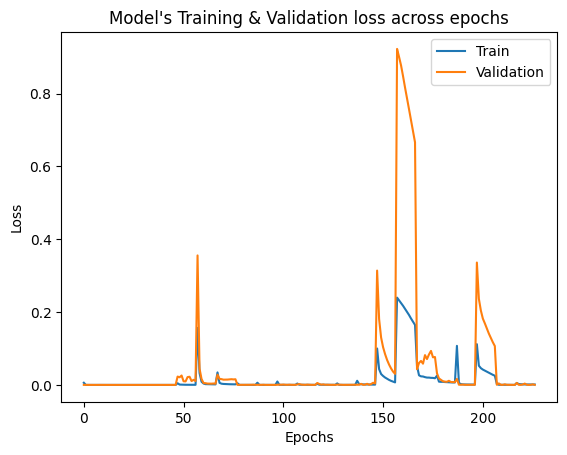

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


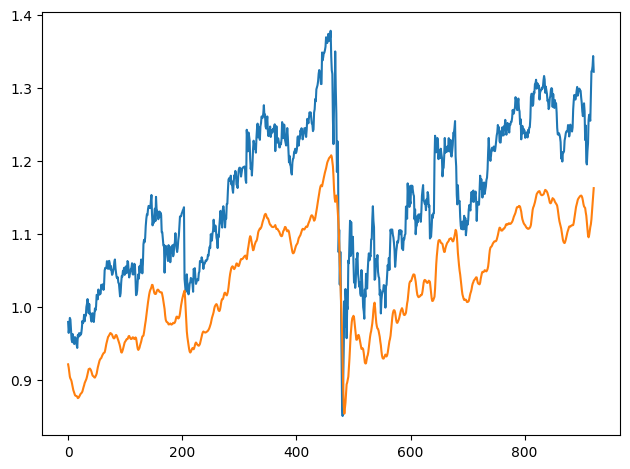

In [593]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=16,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,16, dropout, Adam', X_test, Y_test)

### Adamax 

Epoch 1/200


102/102 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - loss: 0.0264 - mean_absolute_error: 0.1039 - val_loss: 4.9391e-04 - val_mean_absolute_error: 0.0185
Epoch 2/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 5.0187e-04 - mean_absolute_error: 0.0146 - val_loss: 3.9020e-04 - val_mean_absolute_error: 0.0161
Epoch 3/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 4.6640e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0011 - val_mean_absolute_error: 0.0290
Epoch 4/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 4.7320e-04 - mean_absolute_error: 0.0143 - val_loss: 4.4062e-04 - val_mean_absolute_error: 0.0173
Epoch 5/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 4.6424e-04 - mean_absolute_error: 0.0141 - val_loss: 4.7106e-04 - val_mean_absolute_error: 0.0180
Epoch 6/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 4.4148e-04 - mean_absolute_error: 0.0136 - val_loss: 5.7164e-04 - val_mean_absolute_error: 0.0202
Epoch 7/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - lo

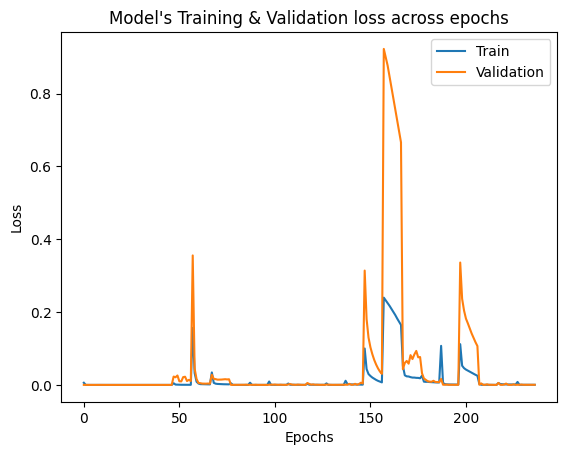

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


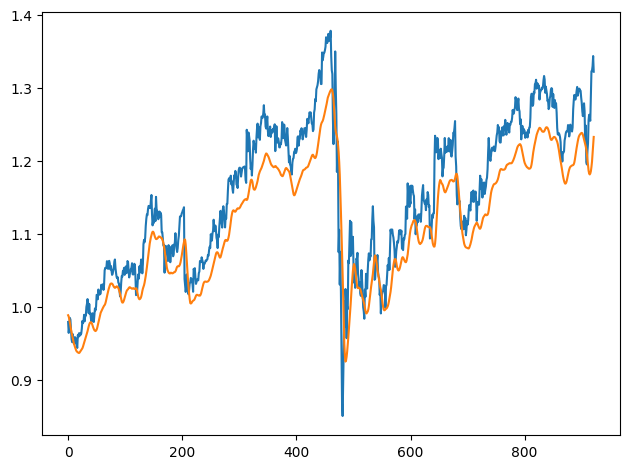

In [594]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L4 U50, Dropout, Adamax ', X_test, Y_test)

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0660 - val_loss: 0.0014 - val_mean_absolute_error: 0.0355
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0029 - mean_absolute_error: 0.0371 - val_loss: 5.2117e-04 - val_mean_absolute_error: 0.0201
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0028 - mean_absolute_error: 0.0366 - val_loss: 0.0017 - val_mean_absolute_error: 0.0392
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0026 - mean_absolute_error: 0.0352 - val_loss: 2.3970e-04 - val_mean_absolute_error: 0.0119
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0022 - mean_absolute_error: 0.0327 - val_loss: 0.0018 - val_mean_absolute_error: 0.0396
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0020 - mean_absolute_error: 0.0313 - val_loss: 2.7853e-04 - val_mean_absolute_error: 0.0137
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0018 - mean_absolute_er

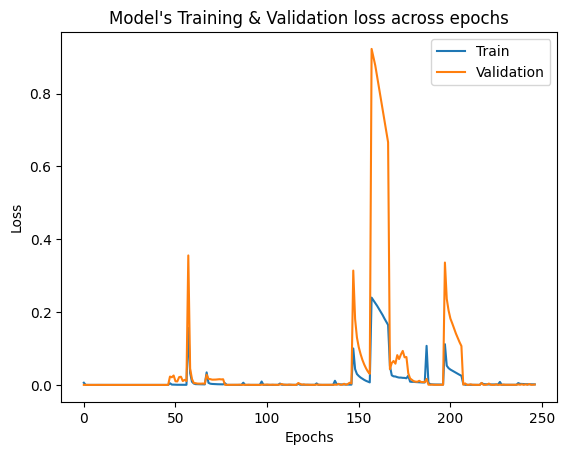

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


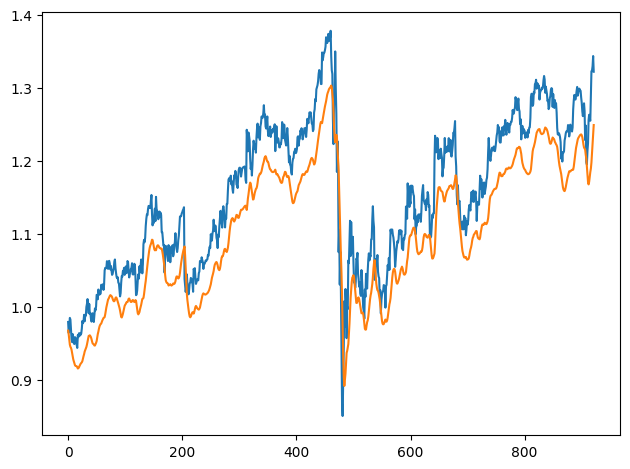

In [595]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64, 32 dropout, Adamax', X_test, Y_test)

### Adagrad

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0995 - mean_absolute_error: 0.2515 - val_loss: 0.1038 - val_mean_absolute_error: 0.3164
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0261 - mean_absolute_error: 0.1372 - val_loss: 0.0601 - val_mean_absolute_error: 0.2405
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0164 - mean_absolute_error: 0.1078 - val_loss: 0.0329 - val_mean_absolute_error: 0.1777
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0106 - mean_absolute_error: 0.0859 - val_loss: 0.0189 - val_mean_absolute_error: 0.1343
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0078 - mean_absolute_error: 0.0713 - val_loss: 0.0106 - val_mean_absolute_error: 0.1002
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0060 - mean_absolute_error: 0.0611 - val_loss: 0.0064 - val_mean_absolute_error: 0.0777
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0049 - mean_absolute_error: 0.0540 -

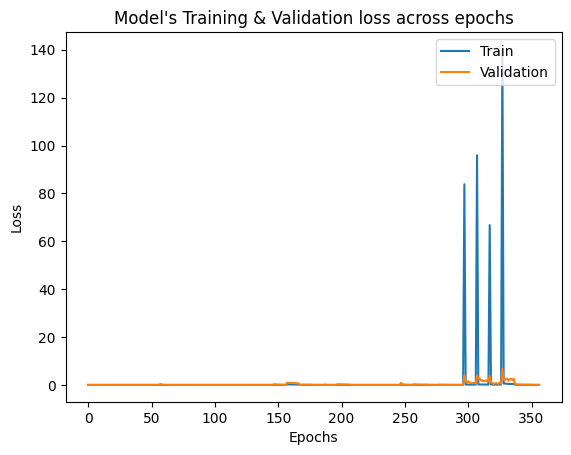

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


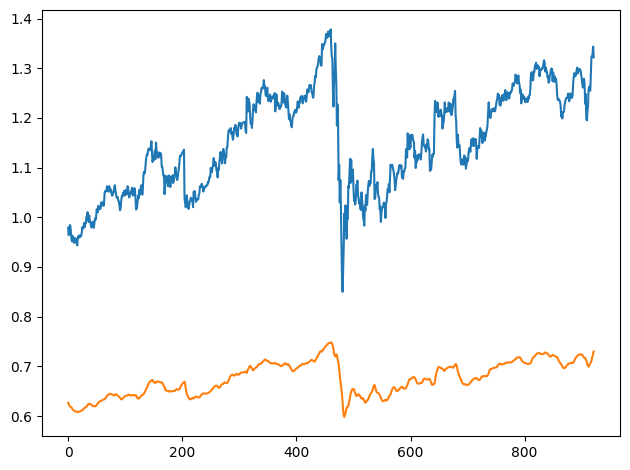

In [616]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer=Adagrad(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32 dropout, Adagrad', X_test, Y_test)

### SDG

In [597]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=SGD(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.1552 - mean_absolute_error: 0.3234 - val_loss: 0.2763 - val_mean_absolute_error: 0.5185
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0529 - mean_absolute_error: 0.2026 - val_loss: 0.1916 - val_mean_absolute_error: 0.4306
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.1830 - val_loss: 0.1579 - val_mean_absolute_error: 0.3905
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.1652 - val_loss: 0.1360 - val_mean_absolute_error: 0.3625
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0319 - mean_absolute_error: 0.1538 - val_loss: 0.1151 - val_mean_absolute_error: 0.3333
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0279 - mean_absolute_error: 0.1422 - val_loss: 0.1001 - val_mean_absolute_error: 0.3109
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.1330 -

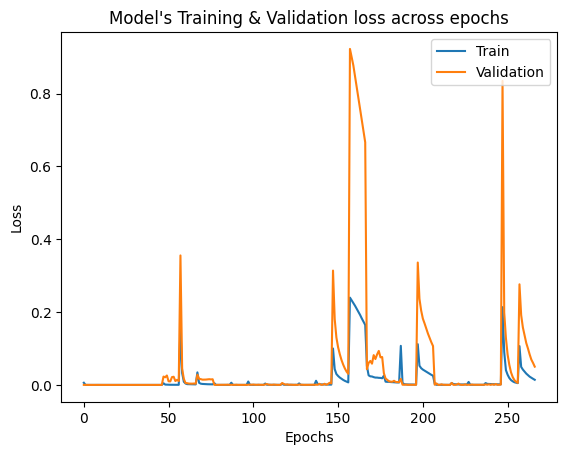

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


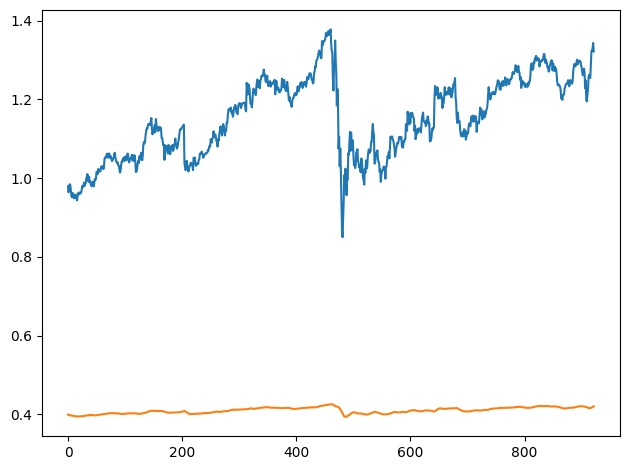

In [598]:

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32 dropout, SGD', X_test, Y_test)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.1471 - val_loss: 0.0415
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0092 - val_loss: 0.0067
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - val_loss: 0.0047
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - val_loss: 0.0029


Model: "sequential_214"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_196 (Dropout)           │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_138 (GRU)                   │ (None, 1, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_139 (GRU)                   │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_397 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,973 (406.15 KB)

 Trainable params: 34,657 (135.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,316 (270.77 KB)

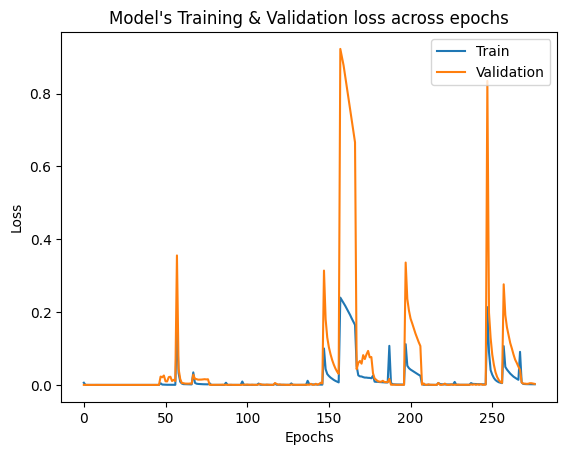

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


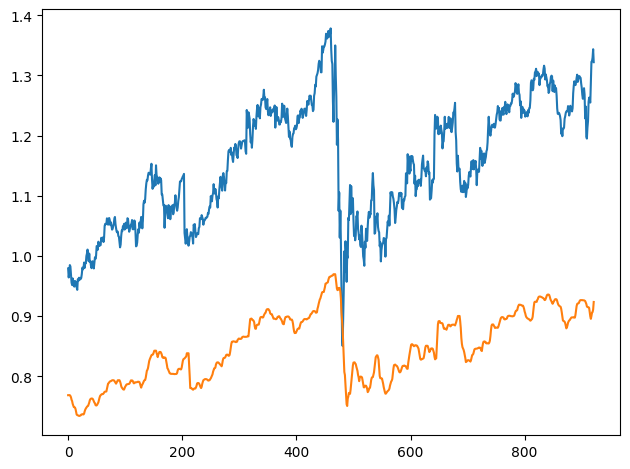

In [599]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=5))
model_conv.add(Dropout(0.2))
model_conv.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
model_conv.add(GRU(units=32,activation='tanh'))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + GRU L2 U64,32, dropout, Adam', X_test, Y_test)

### custom loss

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - val_loss: 0.0645 - val_mean_absolute_error: 0.0644
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - val_loss: 0.0187 - val_mean_absolute_error: 0.0187
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0510 - val_mean_absolute_error: 0.0509
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - loss: 0.0253 - mean_absolute_error: 0

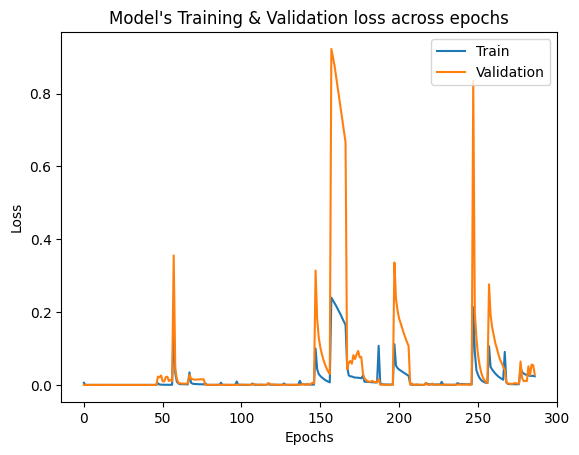

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step


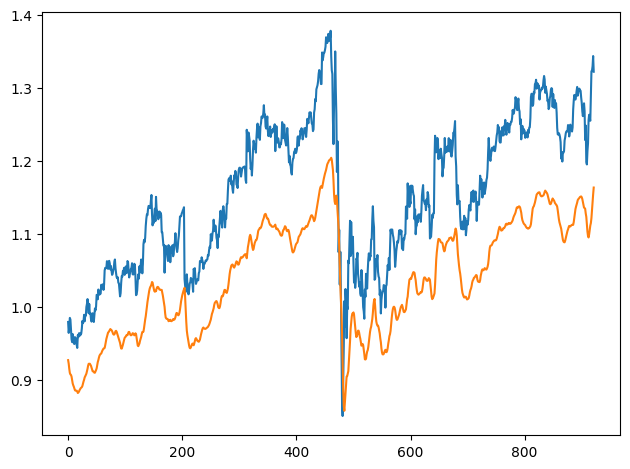

In [600]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=16,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = custom_loss)
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32, Dropout, custom loss, Adam ', X_test, Y_test)

## Fully connected

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0293 - val_loss: 0.0170
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011 - val_loss: 9.6453e-04
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.8349e-04 - val_loss: 3.9006e-04
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.2556e-04 - val_loss: 3.8710e-04
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5854e-04 - val_loss: 3.8579e-04
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.2179e-04 - val_loss: 3.6104e-04
Epoch 8/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.4429e-04 - val_loss: 3.7784e-04
Epoch 9/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.3063e-04 - val_loss: 3.9017e-04
Epoch 10/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2111e-04 - val_loss: 3.6662e-04


Model: "sequential_216"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_399 (Dense)               │ (None, 10, 12)         │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_400 (Dense)               │ (None, 10, 8)          │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_401 (Dense)               │ (None, 10, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413 (1.62 KB)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276 (1.08 KB)

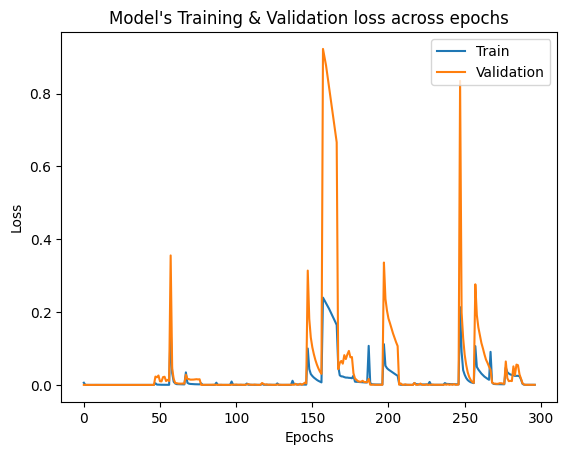

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0340 


0.04081955552101135

In [601]:

model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])


model.summary()

plotloss(history)

accuracy = model.evaluate(X_test, Y_test)

accuracy


# drugi nacin

In [602]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [603]:
data

,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [604]:
data2 = data.copy()
data2

,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [605]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(data, '1985-01-07', '2021-12-17', n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1985-01-07,1.289063,1.302083,1.299479,1.307292
1,1985-01-08,1.302083,1.299479,1.307292,1.309896
2,1985-01-09,1.299479,1.307292,1.309896,1.328125
3,1985-01-10,1.307292,1.309896,1.328125,1.341146
4,1985-01-11,1.309896,1.328125,1.341146,1.335938
...,...,...,...,...,...
9310,2021-12-13,55.000000,54.860001,56.279999,57.759998
9311,2021-12-14,54.860001,56.279999,57.759998,57.799999
9312,2021-12-15,56.279999,57.759998,57.799999,58.060001
9313,2021-12-16,57.759998,57.799999,58.060001,58.650002


## Priprema podataka

In [606]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9315,), (9315, 3, 1), (9315,))

In [607]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

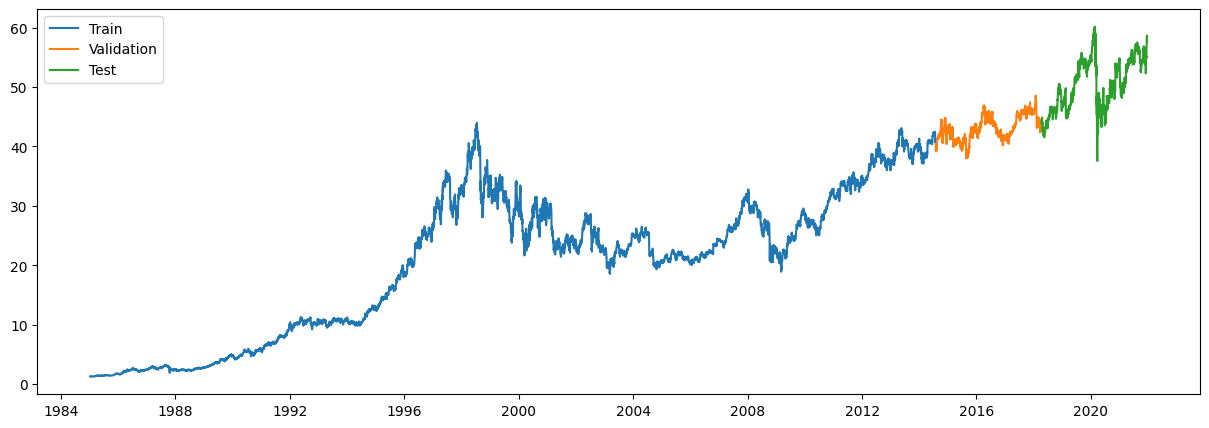

In [608]:
plt.figure(figsize=(15,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

## Modeli

### lstm

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 222.5255 - mean_absolute_error: 9.8523 - val_loss: 4.1373 - val_mean_absolute_error: 1.7064
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1555 - mean_absolute_error: 0.2496 - val_loss: 1.5229 - val_mean_absolute_error: 0.9298
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1394 - mean_absolute_error: 0.2480 - val_loss: 1.0545 - val_mean_absolute_error: 0.7672
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1602 - mean_absolute_error: 0.2554 - val_loss: 1.5319 - val_mean_absolute_error: 1.0412
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1534 - mean_absolute_error: 0.2602 - val_loss: 1.0236 - val_mean_absolute_error: 0.7851
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1326 - mean_absolute_error: 0.2370 - val_loss: 0.9805 - val_mean_absolute_error: 0.7752
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1571 - mean_absolute_error: 0.2586 - val_loss:

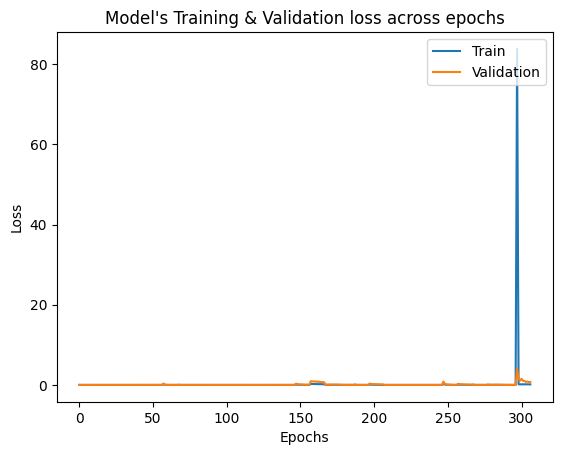

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


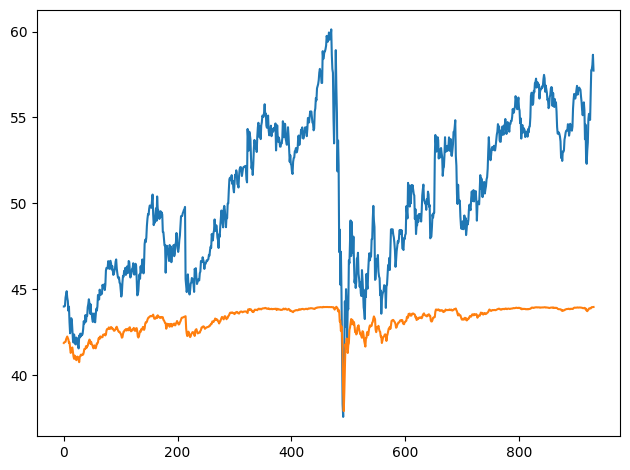

In [609]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))

model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'Data 2, LSTM U64, fully connected, Adam', X_test_1, y_test_1)


### GRU 128,64

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 247.7291 - mean_absolute_error: 10.7125 - val_loss: 4.0189 - val_mean_absolute_error: 1.5544
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1690 - mean_absolute_error: 0.2846 - val_loss: 2.7453 - val_mean_absolute_error: 1.2653
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1613 - mean_absolute_error: 0.2731 - val_loss: 2.7620 - val_mean_absolute_error: 1.2881
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1436 - mean_absolute_error: 0.2585 - val_loss: 1.8930 - val_mean_absolute_error: 0.9999
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1850 - mean_absolute_error: 0.2921 - val_loss: 1.9844 - val_mean_absolute_error: 1.0404
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1441 - mean_absolute_error: 0.2530 - val_loss: 1.5795 - val_mean_absolute_error: 0.9132
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1553 - mean_absolute_error: 0.2691 - val_lo

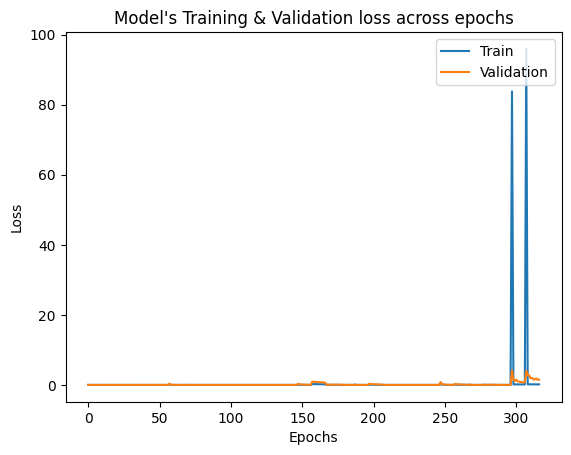

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


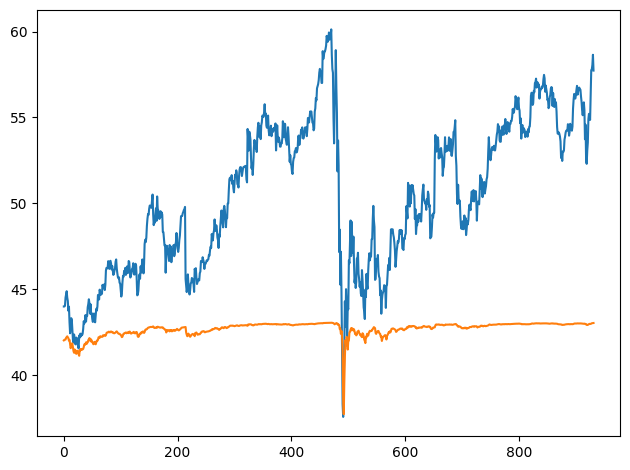

In [610]:
model = tf.keras.Sequential()
model.add(GRU(128,  return_sequences=True, input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
model.add(GRU(64))

model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'Data 2 GRU L2 U128,64, Adam', X_test_1, y_test_1)




### LSTM Bidirectional

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 195.9109 - mean_absolute_error: 8.9365 - val_loss: 3.8581 - val_mean_absolute_error: 1.7475
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1843 - mean_absolute_error: 0.2870 - val_loss: 1.0602 - val_mean_absolute_error: 0.7925
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1713 - mean_absolute_error: 0.2637 - val_loss: 0.8383 - val_mean_absolute_error: 0.7101
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1497 - mean_absolute_error: 0.2504 - val_loss: 0.4644 - val_mean_absolute_error: 0.5407
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1491 - mean_absolute_error: 0.2525 - val_loss: 0.6317 - val_mean_absolute_error: 0.6168
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1499 - mean_absolute_error: 0.2565 - val_loss: 0.6906 - val_mean_absolute_error: 0.6649
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1541 - mean_absolute_error: 0.2513 - val_loss: 

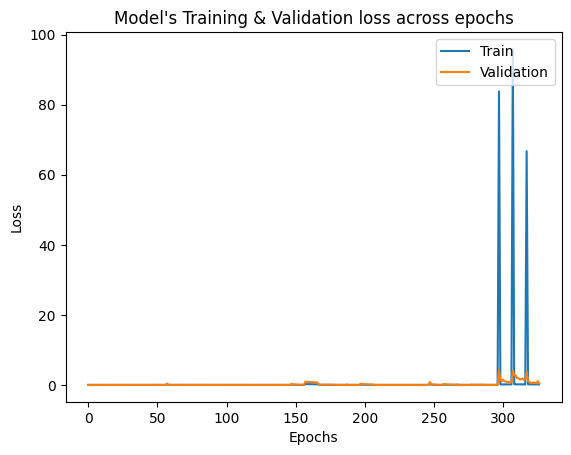

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


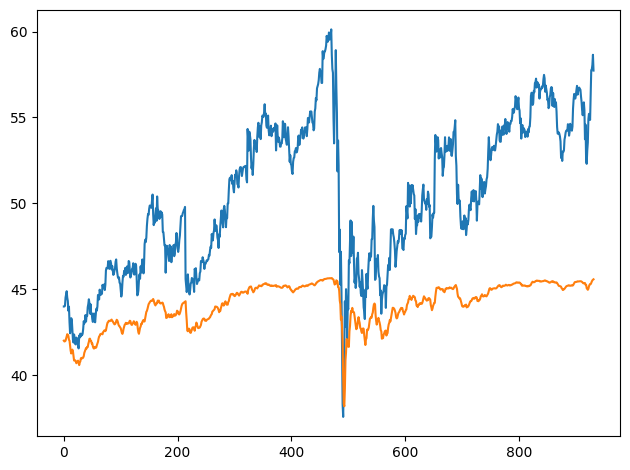

In [611]:
from keras.layers import  Bidirectional

model = tf.keras.Sequential()
model.add(Bidirectional(LSTM(64, input_shape = (X_train_1.shape[1],X_train_1.shape[2])) ))

model.add(Dense(64,activation="relu"))

model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])


plotloss(history)
print_result(model, 'Data 2 Bidirectional LSTM 64', X_test_1, y_test_1)

### LSTM 64,32, Dropout

In [612]:


model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences=True, input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=False))


model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))


model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Model: "sequential_220"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_227 (LSTM)                 │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_199 (Dropout)           │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_228 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_414 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_415 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_416 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_417 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_418 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 323.0955 - mean_absolute_error: 13.3188 - val_loss: 6.8082 - val_mean_absolute_error: 2.2833
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7304 - mean_absolute_error: 0.6384 - val_loss: 2.1157 - val_mean_absolute_error: 1.1027
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5805 - mean_absolute_error: 0.5604 - val_loss: 2.1247 - val_mean_absolute_error: 1.0929
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5204 - mean_absolute_error: 0.5287 - val_loss: 2.5805 - val_mean_absolute_error: 1.2276
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4168 - mean_absolute_error: 0.4772 - val_loss: 2.5795 - val_mean_absolute_error: 1.2907
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4241 - mean_absolute_error: 0.4767 - val_loss: 1.6597 - val_mean_absolute_error: 0.9825
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4226 - mean_absolute_error: 0.4771 - val_loss:

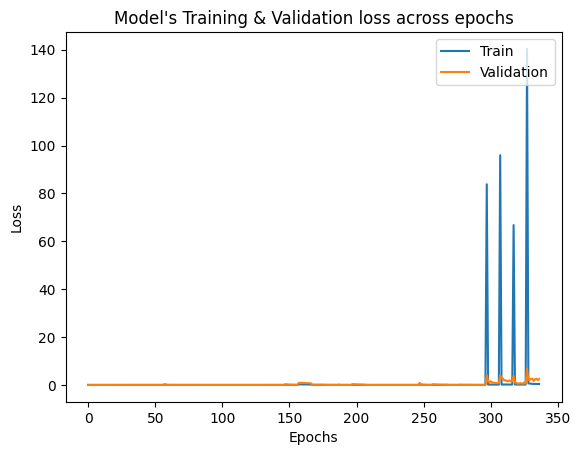

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


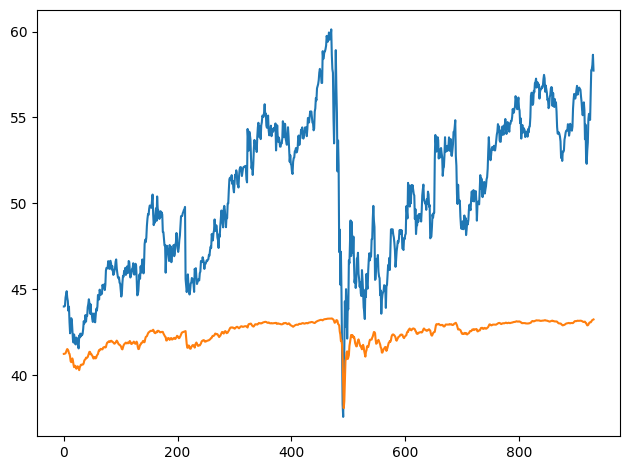

In [613]:
plotloss(history)
print_result(model, 'Data 2 LSTM L2 u64,32, Dropout, Adam', X_test_1, y_test_1)

# result

In [614]:
results.sort_values(by='mean sqrd')

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010750,0.973742,0.000271
4,"LSTM U64, Adam",0.021203,0.911206,0.000916
10,"LSTM L2 U50, dropout Adamax",0.026217,0.868926,0.001353
5,"LSTM U64, fully connected, Adam",0.034290,0.839377,0.001658
19,"GRU L4 U50, Dropout, Adamax",0.044311,0.747572,0.002605
20,"GRU L2 U64, 32 dropout, Adamax",0.052770,0.690024,0.003199
17,"GRU L4 U50, Adam",0.054878,0.633369,0.003784
9,LSTM U64 Adamax,0.054550,0.618238,0.003940
14,"LSTM U64, custom loss Adam",0.065312,0.521095,0.004942
6,"LSTM L2 U64,32 Adam",0.065180,0.467970,0.005491
